In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-disease-uci/heart.csv


In [2]:
df = pd.read_csv('/kaggle/input/heart-disease-uci/heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Feature Selection

<AxesSubplot:>

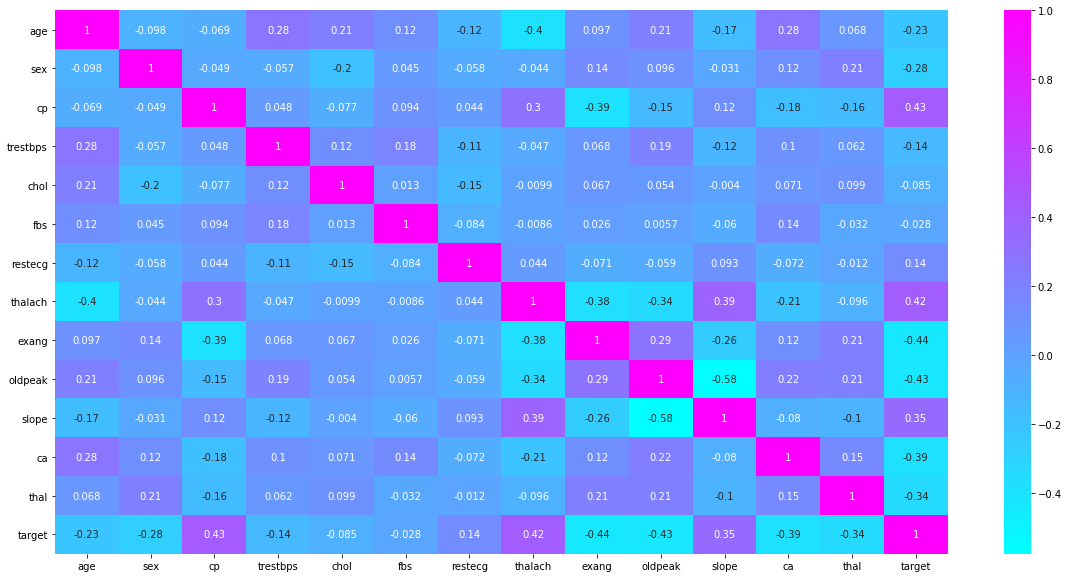

In [5]:
plt.rcParams["figure.figsize"] = (20,10)
sns.heatmap(df.corr(), annot=True, cmap='cool')

[]

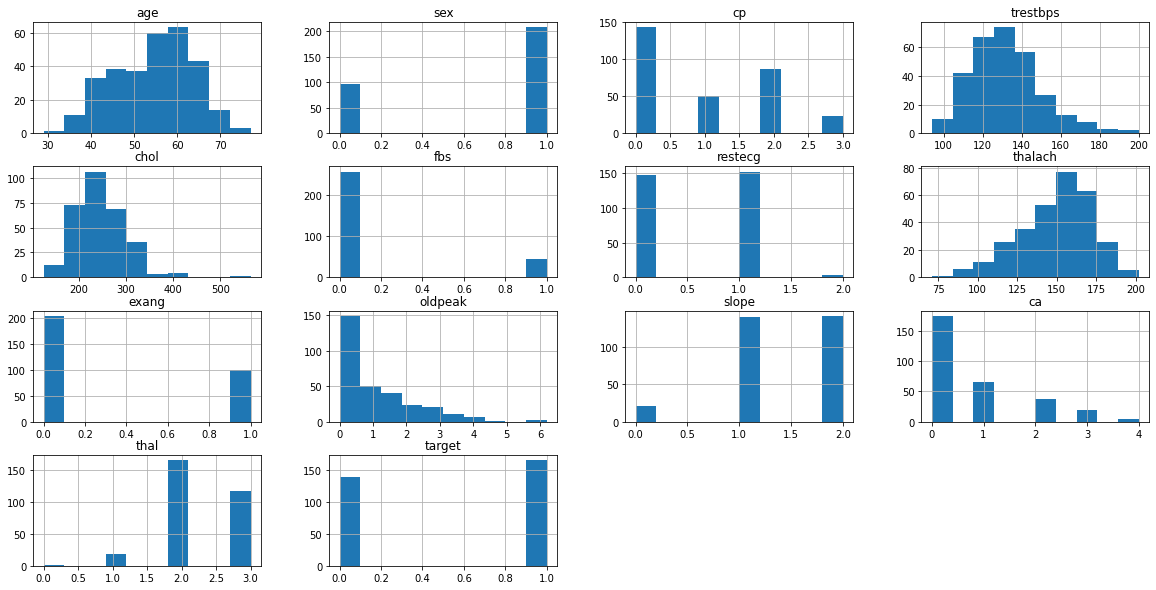

In [6]:
df.hist()
plt.plot()

[]

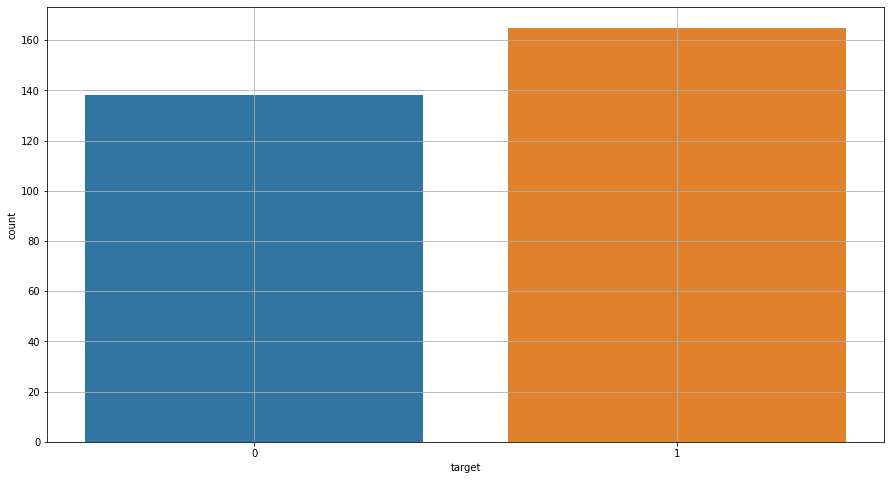

In [7]:
plt.rcParams["figure.figsize"] = (15,8)
sns.countplot(df['target'])
plt.grid(True)
plt.plot()

### Data Processing

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [9]:
df_getDummies = pd.get_dummies(df, columns=['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])

In [10]:
standard_sc = StandardScaler()
scale_col = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
df_getDummies[scale_col] = standard_sc.fit_transform(df_getDummies[scale_col]) 

In [11]:
df_getDummies.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,0.952197,0.763956,-0.256334,0.015443,1.087338,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0


### Define Dependent and Independent Feature

In [12]:
X = df_getDummies.drop(['target'], axis=1) 
y = df_getDummies['target']

### Checking 10 different cross validation score for KNN

In [13]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

[0.7455913978494624, 0.7591397849462365, 0.8120430107526883, 0.8053763440860215, 0.8348387096774192, 0.831505376344086, 0.8416129032258064, 0.8417204301075267, 0.8449462365591398, 0.8448387096774193, 0.8381720430107527, 0.8448387096774195, 0.841505376344086, 0.8415053763440861, 0.8280645161290323, 0.8381720430107527, 0.8280645161290323, 0.8249462365591398, 0.821505376344086, 0.8250537634408601]
Visualization


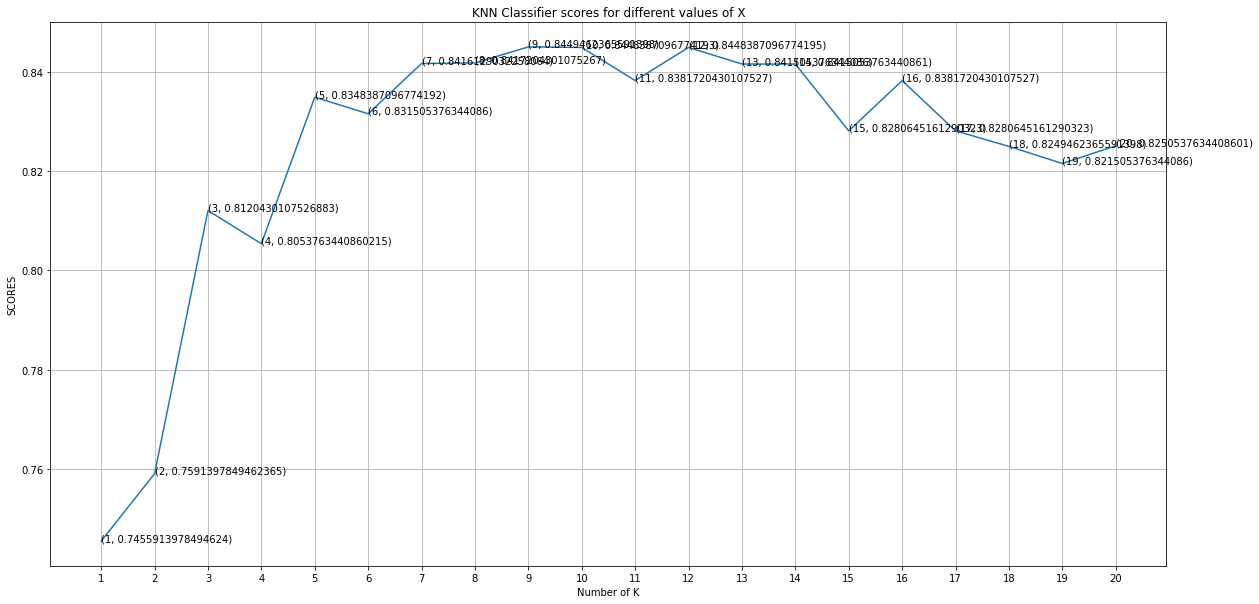

In [14]:
score = []

for k in range(1,21):
    KNNClassifier = KNeighborsClassifier(n_neighbors=k)
    cv_score = cross_val_score(KNNClassifier, X, y, cv=10)
    score.append(cv_score.mean())

print(score)

print("=====================================================")
print("Visualization")
print("=====================================================")

plt.rcParams['figure.figsize'] = (20,10)
plt.plot([k for k in range(1, 21)], score)

for score_value in range(1, 21):
    plt.text(score_value, score[score_value - 1], (score_value, score[score_value - 1]))
    
plt.xticks([score_value for score_value in range(1, 21)])
plt.title("KNN Classifier scores for different values of X")
plt.ylabel("SCORES")
plt.xlabel("Number of K")
plt.grid(True)
plt.show()

### Best Cross Validation Score

In [15]:
KNNClassifier = KNeighborsClassifier(n_neighbors=9)
cv_score = cross_val_score(KNNClassifier, X, y, cv=10)
print(cv_score.mean())

0.8449462365591398
